In [1]:
!pip install msprime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 17.2 MB/s eta 0:00:00


In [2]:
import msprime
from IPython.display import SVG, display

In [4]:
tree_sequence = msprime.simulate(sample_size=500, Ne=0.5,recombination_rate = 0)
tree = tree_sequence.first().newick(precision=10)
f = open("output_tree.txt", 'w')
f.write(tree)
f.close()

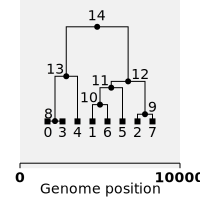

In [5]:
ts = msprime.sim_ancestry(
        samples=4,
        recombination_rate=0,
        sequence_length=10000,
        population_size=10_00,
        random_seed=123456)
# Visualise the simulated ancestral history.
SVG(ts.draw_svg())

#ts.as_fasta()

In [6]:
f = open("output_tree.txt", 'w')
f.write(ts.first().newick(precision=10))
f.close()

In [7]:
!pip install pyvolve
import pyvolve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.2 MB/s eta 0:00:00


In [8]:
my_tree = pyvolve.read_tree(file = "output_tree.txt")

In [9]:
parameters = {"omega":0.75, "kappa":3.25}
my_model = pyvolve.Model("codon", parameters)

Using default codon model, GY-style.


In [10]:
my_partition = pyvolve.Partition(models = my_model, size = 4000)
my_evolver = pyvolve.Evolver(tree=my_tree, partitions = my_partition)
my_evolver()